<a href="https://colab.research.google.com/github/TheNobody-12/Chat-Toxicity-Analyser/blob/main/ColabToxicCommentClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 52.0M/52.6M [00:03<00:00, 24.3MB/s]
100% 52.6M/52.6M [00:03<00:00, 15.9MB/s]


In [10]:
!unzip jigsaw-toxic-comment-classification-challenge.zip

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: test_labels.csv.zip     
  inflating: train.csv.zip           


In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

import tensorflow as tf

In [11]:
# loading data

train_data = pd.read_csv('train.csv.zip', encoding='utf-8')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [12]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [13]:
train_data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [14]:
train_data.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [15]:
train_data[train_data.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

# Text Normalization and Cleaning

Methods for text normalization and cleaning include:


In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def Text_Preprocessing_module(text):
    #Converting Object Data type into String Datatype

    text = str(text)
    # Removal of Punctuation - !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`
    text = re.sub(r'[^\w\s]', '', text)
    #Remove URLS
    text = remove_urls(text)
    # Removing Emojis
    text = remove_emoji(text)
    # Lower casing the Text
    text = text.lower()
    # Stopwords removing
    text = [word for word in word_tokenize(text) if word not in stop_words]
    # # Removing Frequent Words
    # cnt = Counter()
    # for word in text:
    #     cnt[word] += 1
    # FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
    text = " ".join([word for word in text])
    #Tokenization
    text = word_tokenize(text)
    # Stemming and Lemmenization
    text = [lemmatizer.lemmatize(word) for word in text]
    # text = [stemmer.stem(word) for word in text] 
    
    return text

In [17]:
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: Text_Preprocessing_module(x))
train_data['comment_text'] = train_data['comment_text'].apply(lambda x: ' '.join(x))
# train_data.to_csv('/content/drive/MyDrive/train_sample_processed1.csv', index=False)


In [18]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0


In [19]:
from tensorflow.keras.layers import TextVectorization

In [20]:
X = train_data['comment_text']
y = train_data[train_data.columns[2:]].values

In [24]:
MAX_FEATURES = 200000 # max number of words for tokenizer or vocabulary size
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, 
                               output_sequence_length=1800,
                               output_mode='int')
vectorizer.adapt(X.values)
# vectorizer.save('vectorizer')
import json

# Save the vectorizer configuration
with open('vectorizer_config.json', 'w') as f:
    json.dump(vectorizer.get_config(), f)

# Save the vocabulary
vocabulary = vectorizer.get_vocabulary()
with open('vocabulary.txt', 'w') as f:
    for word in vocabulary:
        f.write(word + '\n')

vectorized_text = vectorizer(X.values)
len(X)

159571

In [ ]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  461,    55,    58, ...,     0,     0,     0],
       [    1,   963,  1208, ...,     0,     0,     0],
       [  321,   317,    16, ...,     0,     0,     0],
       ...,
       [28838,  6743,   273, ...,     0,     0,     0],
       [   50,     9,   125, ...,     0,     0,     0],
       [   61,    10,    13, ...,     0,     0,     0]])>

In [ ]:
X_Vec = pd.DataFrame(vectorized_text)

In [ ]:
# spliting into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_Vec,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)


(114890, 1800) (114890, 6)
(12766, 1800) (12766, 6)
(31915, 1800) (31915, 6)


In [ ]:
# #   Making a tensorflow dataset from the vectorized text
# # tensorflow dataset is a data structure that is optimized for training on a GPU or TPU
# # MCSHBAP - map cache shuffle batch prefetch 
# dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
# dataset = dataset.cache()
# dataset = dataset.shuffle(160000)
# dataset = dataset.batch(16) # batch size of 16
# dataset = dataset.prefetch(8) # prefetching data to optimize training and AUTOtune is used to automatically determine the number of batches to prefetch


In [ ]:
# batch_x , batch_y = dataset.as_numpy_iterator().next()

In [ ]:
# batch_x.shape,batch_y.shape

In [ ]:
# train = dataset.take(int(len(X)*0.7))
# val = dataset.skip(int(len(X)*0.7)).take(int(len(X)*0.2))
# test = dataset.skip(int(len(X)*0.9)).take(int(len(X)*0.1))

In [ ]:
# train_generator = train.as_numpy_iterator()

In [ ]:
# train_generator.next()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Embedding

model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='BinaryCrossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [ ]:
# model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model.summary()

In [ ]:
# history = model.fit(train,epochs=1,validation_data=val)
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_val,y_val))

Epoch 1/5
3591/3591 [==============================] - 459s 125ms/step - loss: 0.0636 - accuracy: 0.9850 - val_loss: 0.0484 - val_accuracy: 0.9944
Epoch 2/5
3591/3591 [==============================] - 333s 93ms/step - loss: 0.0421 - accuracy: 0.9931 - val_loss: 0.0493 - val_accuracy: 0.9944
Epoch 3/5
3591/3591 [==============================] - 324s 90ms/step - loss: 0.0342 - accuracy: 0.9922 - val_loss: 0.0551 - val_accuracy: 0.9944
Epoch 4/5
3591/3591 [==============================] - 320s 89ms/step - loss: 0.0282 - accuracy: 0.9762 - val_loss: 0.0581 - val_accuracy: 0.9940
Epoch 5/5
3591/3591 [==============================] - 320s 89ms/step - loss: 0.0234 - accuracy: 0.9615 - val_loss: 0.0692 - val_accuracy: 0.9917


In [ ]:
model.evaluate(X_test,y_test)

998/998 [==============================] - 37s 37ms/step - loss: 0.0699 - accuracy: 0.9916


[0.06989134103059769, 0.9916340112686157]

<Figure size 800x500 with 0 Axes>

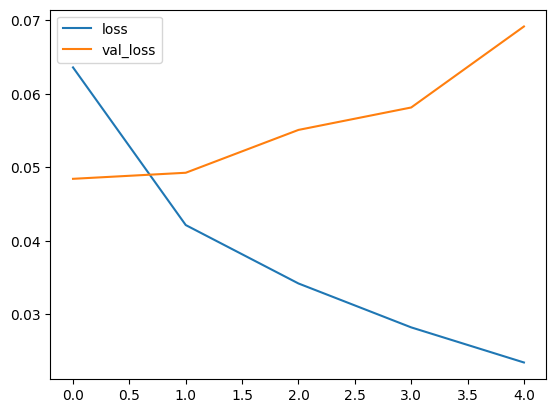

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
loss = pd.DataFrame()
loss['loss'] = pd.DataFrame(history.history['loss'])
loss['val_loss'] = pd.DataFrame(history.history['val_loss'])
loss.plot()
plt.show()

<Figure size 800x500 with 0 Axes>

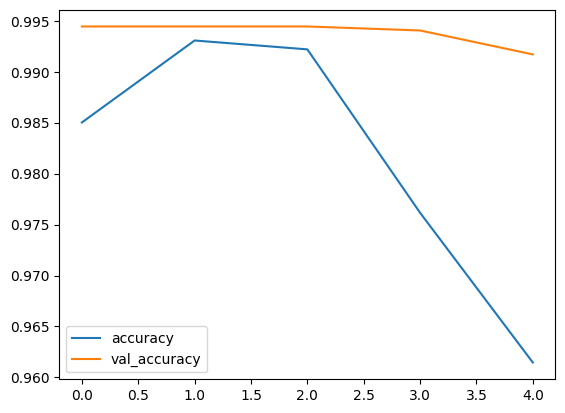

In [ ]:
plt.figure(figsize=(8,5))
loss = pd.DataFrame()
loss['accuracy'] = pd.DataFrame(history.history['accuracy'])
loss['val_accuracy'] = pd.DataFrame(history.history['val_accuracy'])
loss.plot()
plt.show()

# Evaluation

In [ ]:
test_data = pd.read_csv('/content/test.csv.zip')
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
test_label = pd.read_csv('/content/test_labels.csv.zip')
test_label.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
merged_test = pd.merge(test_data,test_label, on='id')
merged_test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [ ]:
df_filtered = merged_test.copy()

In [ ]:
df_filtered['comment_text'] = df_filtered['comment_text'].apply(lambda x: Text_Preprocessing_module(x))

In [ ]:
df_filtered.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,"[yo, bitch, ja, rule, succesful, youll, ever, ...",-1,-1,-1,-1,-1,-1
1,0000247867823ef7,"[rfc, title, fine, imo]",-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,"[source, zawe, ashton, lapland]",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,"[look, back, source, information, updated, cor...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,"[dont, anonymously, edit, article]",-1,-1,-1,-1,-1,-1


In [ ]:
df_filtered['comment_text'] = df_filtered['comment_text'].apply(lambda x: ' '.join(x))

Preddiction Using Model.h5

In [35]:
# model.save('trial1.h5')
from tensorflow.keras.models import load_model

# Load the h5 model file
TextClassifier = load_model('/content/drive/MyDrive/trial1.h5')


In [ ]:
Final_X = df_filtered['comment_text']
Final_y = df_filtered[df_filtered.columns[2:]].values

In [ ]:
Final_X = vectorizer(Final_X)

In [ ]:
model.evaluate(Final_X,Final_y)

4787/4787 [==============================] - 177s 36ms/step - loss: -9.1488 - accuracy: 0.9870


[-9.148767471313477, 0.9869616627693176]

In [ ]:
prediction = model.predict(Final_X)

4787/4787 [==============================] - 1398s 291ms/step


In [ ]:
print(prediction[0:5])

[[9.98659492e-01 2.73372918e-01 9.93078828e-01 1.33171994e-02
  9.41366553e-01 1.11529574e-01]
 [4.74257064e-07 4.31133361e-21 1.80147633e-10 7.95485275e-11
  2.95854319e-09 8.91430647e-13]
 [4.99197207e-02 7.08915593e-07 4.99007991e-04 6.04314788e-04
  3.79286986e-03 1.42743345e-04]
 [5.25912558e-09 8.17433617e-27 3.18168397e-13 1.50579907e-13
  1.23478120e-11 5.16806035e-16]
 [1.05151659e-04 1.25351152e-14 1.28006675e-07 1.00172009e-07
  1.94019458e-06 3.77954779e-09]]


In [ ]:
category=prediction
for j in range(prediction.shape[0]):
    category[j] = [0 if item<=0.5 else 1 for item in prediction[j] ]
    
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
pred=pd.DataFrame(category,columns = label_cols)
submid = pd.DataFrame({'id': df_filtered['id']})
submission = pd.concat([submid,pred], axis=1)
submission.to_csv('submission.csv', index=False)

In [ ]:
submission['id'][10:20]

10    0002eadc3b301559
11    0002f87b16116a7f
12    0003806b11932181
13    0003e1cccfd5a40a
14    00059ace3e3e9a53
15    000634272d0d44eb
16    000663aff0fffc80
17    000689dd34e20979
18    000834769115370c
19    000844b52dee5f3f
Name: id, dtype: object

In [ ]:
submission.shape

(153164, 7)

Passing Input and classifings tweets

In [29]:
# new_text = ["This is a new text to be vectorized"]
# import pickle
# # Load the vectorizer
# with open('/content/vectorizer.pkl', 'rb') as f:
#     vectorizer1 = pickle.load(f)

from tensorflow.keras.layers import TextVectorization

# Load the vectorizer configuration
with open('vectorizer_config.json', 'r') as f:
    vectorizer_config = json.load(f)

# Create a new vectorizer using the loaded configuration
vectorizer = TextVectorization.from_config(vectorizer_config)

# Load the vocabulary
vocabulary = []
with open('vocabulary.txt', 'r') as f:
    for line in f:
        word = line.strip()
        vocabulary.append(word)

# Adapt the vectorizer to the loaded vocabulary
vectorizer.set_vocabulary(vocabulary)

Enter the chatHey Bitch Back off do not come near me
tf.Tensor(
[[ 321    0    0 ...    0    0    0]
 [ 593    0    0 ...    0    0    0]
 [  78    0    0 ...    0    0    0]
 [ 126    0    0 ...    0    0    0]
 [1209    0    0 ...    0    0    0]], shape=(5, 1800), dtype=int64)
1/1 [==============================] - 4s 4s/step
[[9.9640060e-03 1.7108020e-08 1.5764612e-04 9.6140357e-05 6.7731366e-04
  1.5109019e-05]
 [9.9944121e-01 1.4511782e-01 9.9748909e-01 9.5122392e-05 7.0307910e-01
  6.3508411e-04]
 [1.3146163e-03 2.1450744e-11 4.3627842e-06 3.8820158e-06 4.7961294e-05
  3.3271178e-07]
 [3.4736537e-03 4.9630899e-10 1.6508468e-05 2.1038641e-05 1.8015335e-04
  2.4545250e-06]
 [2.7446329e-04 6.2433170e-13 1.4735108e-06 7.0491501e-07 8.7156295e-06
  4.5189751e-08]]


In [45]:
user_input = Text_Preprocessing_module(input('Enter the chat'))
user_input=' '.join(user_input)
print(user_input)
vectorized_text = vectorizer(user_input)

# Print the vectorized text
print(vectorized_text)

# user_input = 
# prediction = TextClassifier.predict(vectorized_text)

Enter the chatHey Bitch Back off do not come near me
hey bitch back come near
tf.Tensor([321 593  78 ...   0   0   0], shape=(1800,), dtype=int64)


In [46]:
prediction = TextClassifier.predict(np.expand_dims(vectorized_text,0))

1/1 [==============================] - 0s 58ms/step


In [50]:
prediction

array([[9.9562043e-01, 3.5239246e-02, 9.8250169e-01, 2.2302454e-04,
        9.0002137e-01, 4.0483000e-03]], dtype=float32)

In [48]:
train_data.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [49]:
import numpy as np

# Define the threshold
threshold = 0.5
# Convert the prediction probabilities to binary form
binary_predictions = np.where(prediction > threshold, 1, 0)
binary_predictions

array([[1, 0, 1, 0, 1, 0]])

In [59]:
# def score_chat(comment):
#   vectorized_text = vectorizer(comment)
#   results = TextClassifier.predict(np.expand_dims(vectorized_text,0))

#   text = ''
#   for idx,col in enumerate(train_data.columns[2:]):
#     text += '{}: {}'.format(col,results[0][idx]>0.5)
#     text += ''

#   return text

In [60]:
# score_chat(user_input)

1/1 [==============================] - 0s 138ms/step


'toxic:True /n severe_toxic:False /n obscene:True /n threat:False /n insult:True /n identity_hate:False /n '

In [61]:
class_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

predicted_classes = [class_labels[i] for i, pred in enumerate(binary_predictions[0]) if pred == 1]

print(predicted_classes)

['toxic', 'obscene', 'insult']
